In [3]:
import pandas as pd
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from tqdm import tqdm

In [40]:
with open(r'../Dataset/dataframe.pkl', 'rb') as f:
    df = pk.load(f)

In [41]:
df["Size"] = df["Simplices"].apply(lambda x : len(x))

In [134]:
av_size=df.groupby('Time')['Size'].mean()

In [142]:
av_size=av_size.to_frame().reset_index()

In [144]:
av_size=av_size[av_size['Time']>=1980]

In [42]:
y1 = 2000
y2 = 2001
size_max = 21
size_min = 6

In [43]:
l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
len(l2)

2960

In [44]:
over = np.zeros((len(l1),len(l2)))
inclusion = np.zeros((len(l1),len(l2)))

In [46]:
def overlap_size(a,b):
    return len(a & b)/len(a | b)

def inclusion_size(a,b):
    if b.issubset(a):
        return len(b) - len(a)
    elif a.issubset(b):
        return len(b) - len(a)
    else:
        return np.nan

In [71]:
dict_inc = {}
dict_over = {}

for k,y1 in enumerate(range(1980,2019,2)):
    size_max = 21
    size_min = 5
    print(y1)
    y2 = y1+1
    l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    over = np.zeros((len(l1),len(l2)))
    inclusion = np.zeros((len(l1),len(l2)))

    for i, s1 in tqdm(enumerate(l1), total = len(l1)):
        for j, s2 in enumerate(l2):
            over[i][j] = overlap_size(set(s1),set(s2))
            inclusion[i][j] = inclusion_size(set(s1),set(s2))
    dict_inc[str(y1)] = inclusion
    dict_over[str(y1)] = over

1980


100%|██████████| 607/607 [00:00<00:00, 673.80it/s]


1982


100%|██████████| 628/628 [00:01<00:00, 485.75it/s]


1984


100%|██████████| 798/798 [00:01<00:00, 439.93it/s]


1986


100%|██████████| 925/925 [00:02<00:00, 400.81it/s]


1988


100%|██████████| 1211/1211 [00:04<00:00, 273.04it/s]


1990


100%|██████████| 1501/1501 [00:07<00:00, 203.66it/s]


In [87]:
means= np.zeros(len(range(1980,2017,2)))
stds= np.zeros(len(range(1980,2017,2)))
for i, y1 in enumerate(range(1980,2017,2)):    
    df2 = dict_inc[str(y1)].flatten()[~np.isnan(dict_inc[str(y1)].flatten())]
    means[i]= df2.mean()
    stds[i]= df2.std()

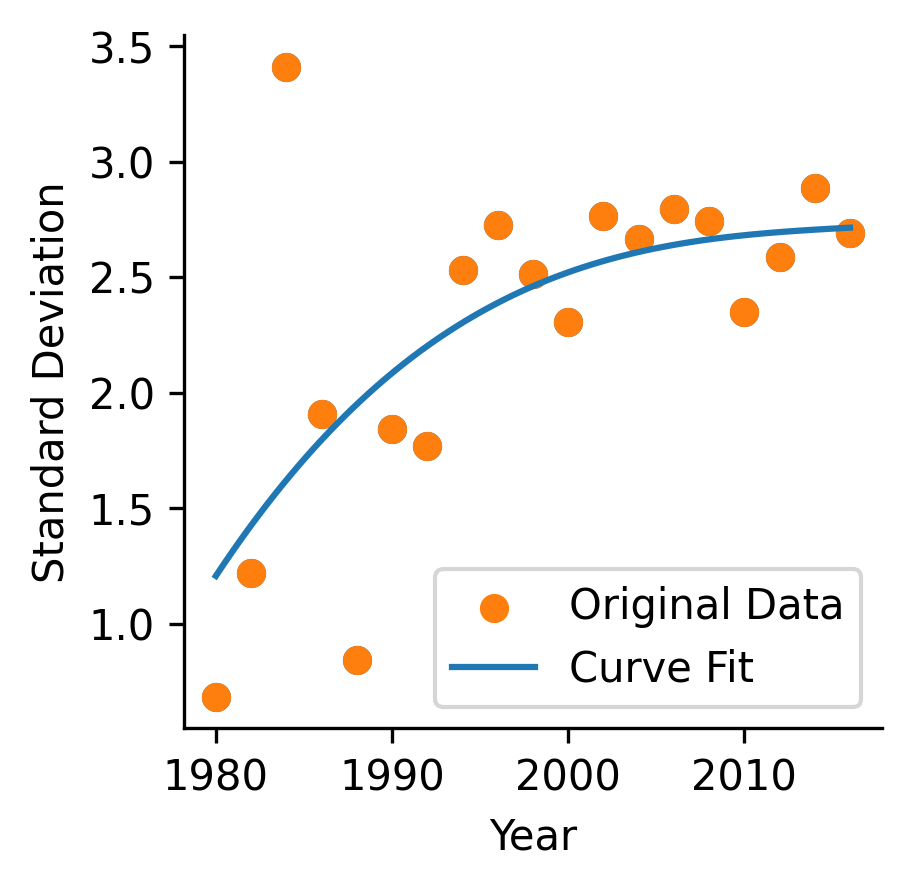

In [175]:
from scipy.interpolate import interp1d
from matplotlib.pyplot import errorbar
new_x = np.linspace(1980, 2016, 100)  # Adjust the number of points as needed

# Interpolate y-values for new_x
new_y = np.interp(new_x, np.array(range(1980,2017,2)), stds)
x=np.array(range(1980,2017,2))
y=stds

fig, ax = plt.subplots(figsize=(3,3),dpi=300)
ax.scatter(x=x,y=y)

degree = 3  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, y, degree)
curve_fit = np.poly1d(coefficients)

# New x-values for plotting the curve
new_x = np.linspace(1980, 2016, 100)  # Adjust the number of points as needed

# Evaluate the curve fit for new_x
new_y = curve_fit(new_x)

# Plot the original scatter plot
ax.scatter(x, y, label='Original Data')


# Plot the curve fit
ax.plot(new_x, new_y, label='Curve Fit')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Standard Deviation')
#plt.title('Std')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show legend
ax.legend()

# Display the plot
plt.show()


#errorbar(x=np.array(range(1980,2016,4)),y=means, yerr=stds)

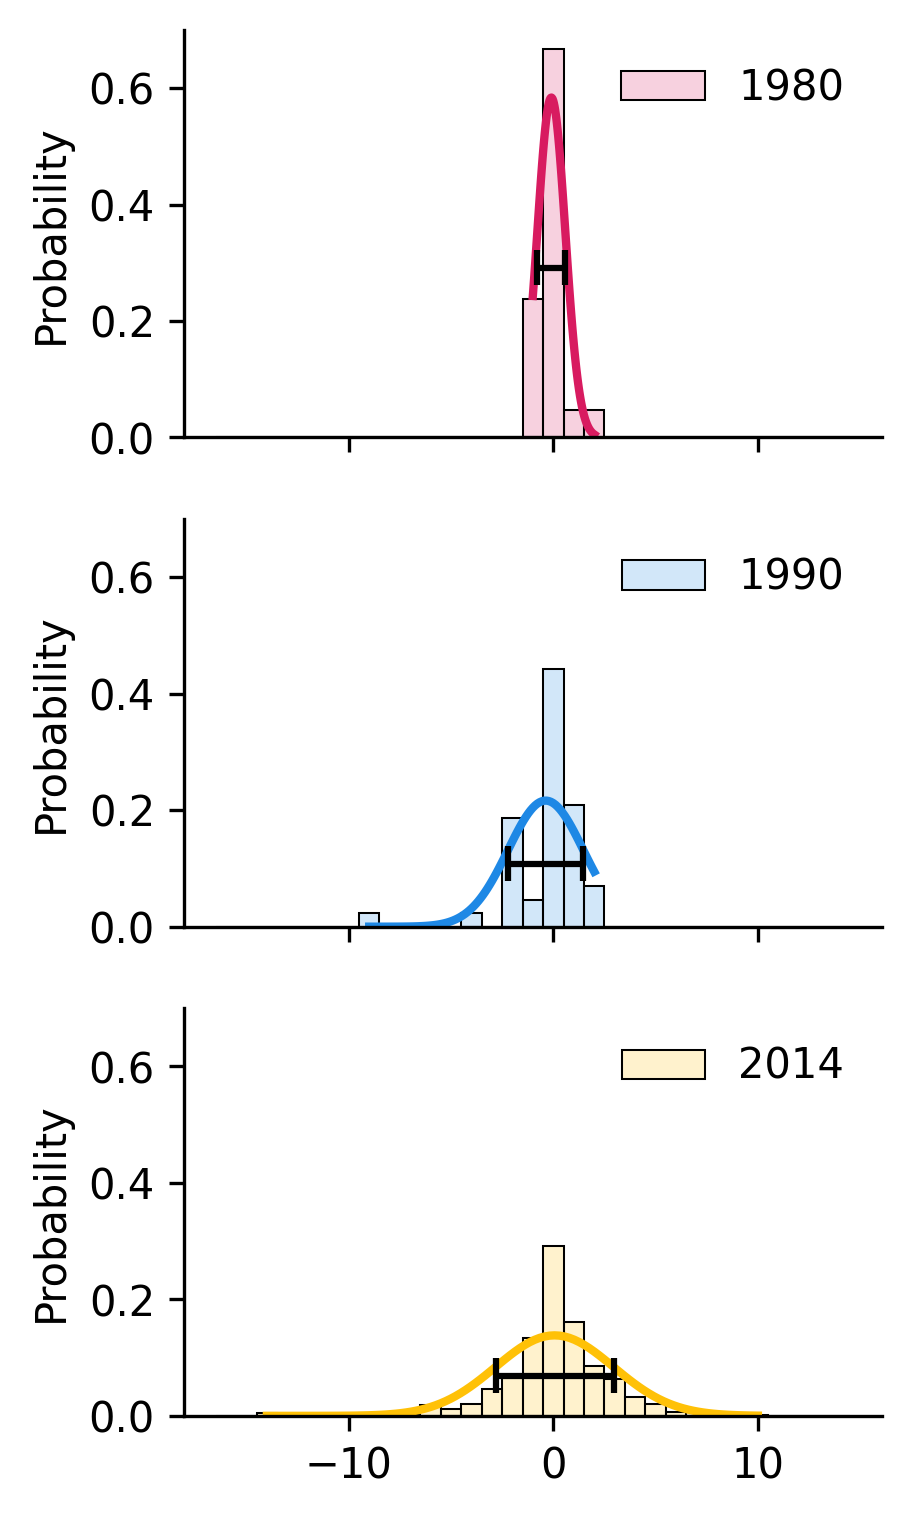

In [189]:
from scipy.stats import norm

size_max = 21
size_min = 5

palette=['#D81B60','#1E88E5','#FFC107','#004D40','#DF8C17']
fig,ax=plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(3,6),dpi=300,sharey=True)

for i, y1 in enumerate([1980, 1990, 2014]):
    df1 = dict_inc[str(y1)].flatten()
    df1 = df1[~np.isnan(df1)]
    sns.histplot(df1, bins=np.array(range(size_min - size_max, size_max - size_min)) - 0.5,
                 stat="probability", label=str(y1), color=palette[i], alpha=0.2, ax=ax[i])
     # Fit Gaussian distribution to data
    mu, std = norm.fit(df1)
    x = np.linspace(df1.min(), df1.max(), 100)
    y = norm.pdf(x, mu, std)
    
    # Plot Gaussian curve
    ax[i].plot(x, y, '-', color=palette[i], linewidth=2)
    ax[i].legend(frameon=False)
    ax[i].x
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    bar_height = max(y)/2
    ax[i].hlines(bar_height, mu - std, mu + std, color='black', linewidth=1.5, linestyle='-')
    ax[i].vlines([mu - std, mu + std], [bar_height-0.03, bar_height-0.03], [bar_height+0.03, bar_height+0.03], color='black', linewidth=1.5)


plt.show()
